In [ ]:
import yfinance as yf

In [5]:
import yfinance as yf
import polars as pl
import datetime

# Set the start and end dates
start = datetime.datetime(2023, 1, 1)
end = datetime.datetime.now()

# Fetch data for AAPL using yfinance
AAPL = yf.Ticker("AAPL")
df_AAPL = AAPL.history(start=start, end=end)

# Convert the pandas DataFrame to a Polars DataFrame
df_pl_AAPL = pl.from_pandas(df_AAPL)

# Display the first few rows
print(df_pl_AAPL.head())

# You can now use df_polars for further analysis with Polars

shape: (5, 7)
┌────────────┬────────────┬────────────┬────────────┬───────────┬───────────┬──────────────┐
│ Open       ┆ High       ┆ Low        ┆ Close      ┆ Volume    ┆ Dividends ┆ Stock Splits │
│ ---        ┆ ---        ┆ ---        ┆ ---        ┆ ---       ┆ ---       ┆ ---          │
│ f64        ┆ f64        ┆ f64        ┆ f64        ┆ i64       ┆ f64       ┆ f64          │
╞════════════╪════════════╪════════════╪════════════╪═══════════╪═══════════╪══════════════╡
│ 129.215478 ┆ 129.830407 ┆ 123.155402 ┆ 124.04805  ┆ 112117500 ┆ 0.0       ┆ 0.0          │
│ 125.853175 ┆ 127.608717 ┆ 124.057967 ┆ 125.327507 ┆ 89113600  ┆ 0.0       ┆ 0.0          │
│ 126.091211 ┆ 126.725981 ┆ 123.740581 ┆ 123.998451 ┆ 80962700  ┆ 0.0       ┆ 0.0          │
│ 124.980372 ┆ 129.225391 ┆ 123.86952  ┆ 128.560867 ┆ 87754700  ┆ 0.0       ┆ 0.0          │
│ 129.40394  ┆ 132.31992  ┆ 128.828678 ┆ 129.086548 ┆ 70790800  ┆ 0.0       ┆ 0.0          │
└────────────┴────────────┴────────────┴────────────┴───

In [7]:
data_AAPL = yf.download("AAPL", "2017-11-01", "2022-12-01")
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-01,42.467499,42.485001,41.402500,41.722500,39.208782,134551200
2017-11-02,41.650002,42.125000,41.320000,42.027500,39.495407,165573600
2017-11-03,43.500000,43.564999,42.779999,43.125000,40.526787,237594400
2017-11-06,43.092499,43.747501,42.930000,43.562500,40.937927,140105200
2017-11-07,43.477501,43.812500,43.400002,43.702499,41.069496,97446000


In [8]:
data_pl_AAPL = pl.from_pandas(data_AAPL)
print(data_pl_AAPL.head())

shape: (5, 6)
┌───────────┬───────────┬───────────┬───────────┬───────────┬───────────┐
│ Open      ┆ High      ┆ Low       ┆ Close     ┆ Adj Close ┆ Volume    │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│ f64       ┆ f64       ┆ f64       ┆ f64       ┆ f64       ┆ i64       │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 42.467499 ┆ 42.485001 ┆ 41.4025   ┆ 41.7225   ┆ 39.208778 ┆ 134551200 │
│ 41.650002 ┆ 42.125    ┆ 41.32     ┆ 42.0275   ┆ 39.495415 ┆ 165573600 │
│ 43.5      ┆ 43.564999 ┆ 42.779999 ┆ 43.125    ┆ 40.526791 ┆ 237594400 │
│ 43.092499 ┆ 43.747501 ┆ 42.93     ┆ 43.5625   ┆ 40.937916 ┆ 140105200 │
│ 43.477501 ┆ 43.8125   ┆ 43.400002 ┆ 43.702499 ┆ 41.069496 ┆ 97446000  │
└───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘


In [13]:
import requests
import polars as pl
from datetime import datetime, timedelta

# Set the date range (CoinGecko allows max 90 days for hourly data)
end = datetime.now()
start = end - timedelta(days=90)

# Convert datetime to Unix timestamp (seconds)
start_ts = int(start.timestamp())
end_ts = int(end.timestamp())

# Construct the API URL
url = f'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range?vs_currency=usd&from={start_ts}&to={end_ts}'

# Make the API request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    
    # Extract price data and create Polars DataFrame
    df_pl = pl.DataFrame({
        'timestamp': [entry[0] for entry in data['prices']],
        'price': [entry[1] for entry in data['prices']]
    })
    
    # Convert timestamp to datetime
    df_pl = df_pl.with_columns(pl.col('timestamp').cast(pl.Int64).cast(pl.Datetime))
    
    print(df_pl.head())
else:
    print(f"Error fetching data: {response.status_code}")

# You can now use df_pl for further analysis with Polars

shape: (5, 2)
┌────────────────────────────┬──────────────┐
│ timestamp                  ┆ price        │
│ ---                        ┆ ---          │
│ datetime[μs]               ┆ f64          │
╞════════════════════════════╪══════════════╡
│ 1970-01-20 19:32:06.455022 ┆ 70932.197619 │
│ 1970-01-20 19:32:10.196348 ┆ 71229.876558 │
│ 1970-01-20 19:32:13.967449 ┆ 71087.25098  │
│ 1970-01-20 19:32:17.529850 ┆ 70854.60006  │
│ 1970-01-20 19:32:20.919485 ┆ 70877.827372 │
└────────────────────────────┴──────────────┘


In [14]:
import requests
import polars as pl
from datetime import datetime, timedelta

# Set the date range (Coinbase Pro allows max 300 candles per request)
end = datetime.now()
start = end - timedelta(days=5)  # Fetch 5 days of data (adjust as needed)

# Convert datetime to ISO 8601 format
start_iso = start.isoformat()
end_iso = end.isoformat()

# Construct the API URL (1-hour candles)
url = f'https://api.pro.coinbase.com/products/BTC-USD/candles?start={start_iso}&end={end_iso}&granularity=3600'

# Make the API request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    
    # Create Polars DataFrame
    df_pl = pl.DataFrame(
        data,
        schema=['timestamp', 'low', 'high', 'open', 'close', 'volume']
    )
    
    # Convert timestamp to datetime and sort
    df_pl = df_pl.with_columns(
        pl.col('timestamp').cast(pl.Int64).cast(pl.Datetime).alias('datetime')
    ).sort('datetime', descending=True)
    
    print(df_pl.head())
else:
    print(f"Error fetching data: {response.status_code}")
    print(response.text)

# You can now use df_pl for further analysis with Polars

shape: (5, 7)
┌────────────┬──────────┬──────────┬──────────┬──────────┬────────────┬────────────────────────────┐
│ timestamp  ┆ low      ┆ high     ┆ open     ┆ close    ┆ volume     ┆ datetime                   │
│ ---        ┆ ---      ┆ ---      ┆ ---      ┆ ---      ┆ ---        ┆ ---                        │
│ i64        ┆ f64      ┆ f64      ┆ f64      ┆ f64      ┆ f64        ┆ datetime[μs]               │
╞════════════╪══════════╪══════════╪══════════╪══════════╪════════════╪════════════════════════════╡
│ 1719702000 ┆ 60850.34 ┆ 60895.79 ┆ 60871.29 ┆ 60892.41 ┆ 3.7810311  ┆ 1970-01-01 00:28:39.702    │
│ 1719698400 ┆ 60758.49 ┆ 60962.96 ┆ 60946.17 ┆ 60871.28 ┆ 132.336419 ┆ 1970-01-01 00:28:39.698400 │
│ 1719694800 ┆ 60840.01 ┆ 60997.79 ┆ 60944.06 ┆ 60946.17 ┆ 133.724124 ┆ 1970-01-01 00:28:39.694800 │
│ 1719691200 ┆ 60863.19 ┆ 60990.0  ┆ 60946.58 ┆ 60944.07 ┆ 71.012329  ┆ 1970-01-01 00:28:39.691200 │
│ 1719687600 ┆ 60824.65 ┆ 60987.84 ┆ 60958.53 ┆ 60946.59 ┆ 73.581869  ┆ 1970-

In [15]:
df_pl = df_pl.with_columns(
    pl.col('close').pct_change().alias('hourly_return')
)

In [16]:
df_pl = df_pl.with_columns(
    pl.col('close').rolling_mean(window_size=24).alias('MA24'),
    pl.col('close').rolling_mean(window_size=48).alias('MA48')
)

In [17]:
highest_price = df_pl['high'].max()
lowest_price = df_pl['low'].min()
print(f"Highest price: {highest_price}")
print(f"Lowest price: {lowest_price}")

Highest price: 62470.0
Lowest price: 59868.0


In [18]:
df_pl = df_pl.with_columns(
    ((pl.col('high') - pl.col('low')) / pl.col('low')).alias('volatility')
)
avg_volatility = df_pl['volatility'].mean()
print(f"Average volatility: {avg_volatility}")

Average volatility: 0.005423791666000088


In [25]:
import requests
import json


In [30]:
prices = requests.get("https://api.poloniex.com/markets/price")
prices_list = []

if prices.status_code == 200:
    prices_json = json.loads(prices.text)
    for p in prices_json:
        prices_list.append({"symbol": p["symbol"], "price": float(p["price"])})


In [36]:
print(prices_list)

[{'symbol': 'BTS_BTC', 'price': 3.65e-08}, {'symbol': 'DASH_BTC', 'price': 0.000408}, {'symbol': 'DOGE_BTC', 'price': 2e-06}, {'symbol': 'LTC_BTC', 'price': 0.001227}, {'symbol': 'XLM_BTC', 'price': 1.51e-06}, {'symbol': 'XEM_BTC', 'price': 2.3e-07}, {'symbol': 'XMR_BTC', 'price': 0.002711}, {'symbol': 'XRP_BTC', 'price': 7.77e-06}, {'symbol': 'BTC_USDT', 'price': 61040.83}, {'symbol': 'DASH_USDT', 'price': 24.4}, {'symbol': 'LTC_USDT', 'price': 74.862}, {'symbol': 'XLM_USDT', 'price': 0.0905}, {'symbol': 'XMR_USDT', 'price': 165.73}, {'symbol': 'XRP_USDT', 'price': 0.4729}, {'symbol': 'ETH_BTC', 'price': 0.0554}, {'symbol': 'ETH_USDT', 'price': 3381.26}, {'symbol': 'SC_BTC', 'price': 7.52e-08}, {'symbol': 'DCR_BTC', 'price': 0.000259}, {'symbol': 'LSK_BTC', 'price': 1.678e-05}, {'symbol': 'STEEM_BTC', 'price': 3.27e-06}, {'symbol': 'ETC_BTC', 'price': 0.00038}, {'symbol': 'ETC_ETH', 'price': 0.00663}, {'symbol': 'ETC_USDT', 'price': 23.184}, {'symbol': 'ARDR_BTC', 'price': 1e-06}, {'s

In [35]:
# First, assign the length to a variable
number_of_prices = len(prices_list)

# Then, print the value
print(number_of_prices)

# Alternatively, you can do this in one line with an f-string:
print(f"Number of prices: {len(prices_list)}")

990
Number of prices: 990


In [45]:
# Import necessary libraries
import requests  # For making HTTP requests
import json      # For parsing JSON responses

# Poloniex Orderbook
# Define the trading pair we're interested in
ticker = "SHIB_USDT"

# Set the number of orderbook entries we want to retrieve
limit = 20 # determined by the api documentation 

# Construct the API URL with our parameters
ob = requests.get(f"https://api.poloniex.com/markets/{ticker}/orderBook?limit={limit}")

# Initialize an empty list to store the JSON response
ob_json = []

# Check if the request was successful
if ob.status_code == 200:
    # If successful, parse the JSON response
    ob_json = json.loads(ob.text)
    # Print the entire JSON response
    print(ob_json)
else:
    # If there was an error, print the status code and error message
    print(f"Error: Status code {ob.status_code}")
    print(ob.text)

{'time': 1719712579644, 'scale': '0.000000001', 'asks': ['0.00001678', '223669957', '0.000016781', '4668000', '0.000016785', '35017784', '0.000016787', '119139811', '0.0000168', '58096714', '0.000016817', '108490943', '0.000016822', '105930579', '0.000016828', '5873811754', '0.000016856', '42934', '0.000016861', '208858616', '0.000016891', '2010057671', '0.000016897', '346832964', '0.00001695', '210577411', '0.000017086', '134268060', '0.000017209', '4375219', '0.00001721', '116211', '0.000017373', '57850', '0.000017504', '161840', '0.000017674', '161832', '0.000017751', '6086956'], 'bids': ['0.000016741', '144951664', '0.000016729', '35880747', '0.000016727', '55978530', '0.000016714', '104026353', '0.0000167', '60479', '0.000016695', '119796346', '0.000016689', '106836334', '0.000016685', '1884371637', '0.000016622', '1450238549', '0.00001662', '208402172', '0.000016605', '367037726', '0.0000166', '60843', '0.000016503', '13190516', '0.000016502', '214913625', '0.0000165', '121212', 

In [46]:
# Structure our orderbook
# Initialize empty lists to store ask prices and sizes
asks_prices = []
asks_sizes = []

# Initialize a counter to keep track of whether we're on a price or size
counts = 0

# Iterate through each item in the "asks" array of the JSON response
for a in ob_json["asks"]:
    if counts == 0:
        # If counts is 0, we're on a price. Append it to asks_prices.
        asks_prices.append(a)
    else:
        # If counts is not 0, we're on a size. Append it to asks_sizes.
        asks_sizes.append(a)
    
    # Increment the counter. This will alternate between 0 and 1.
    counts += 1

# Print the resulting lists of prices and sizes
print(asks_prices)
print(asks_sizes)

['0.00001678']
['223669957', '0.000016781', '4668000', '0.000016785', '35017784', '0.000016787', '119139811', '0.0000168', '58096714', '0.000016817', '108490943', '0.000016822', '105930579', '0.000016828', '5873811754', '0.000016856', '42934', '0.000016861', '208858616', '0.000016891', '2010057671', '0.000016897', '346832964', '0.00001695', '210577411', '0.000017086', '134268060', '0.000017209', '4375219', '0.00001721', '116211', '0.000017373', '57850', '0.000017504', '161840', '0.000017674', '161832', '0.000017751', '6086956']


In [47]:
import requests
import json

# Binance Orderbook
symbol = "BTCUSDT"  # Using BTC/USDT as an example
limit = 20  # Binance allows up to 5000, but we'll use 20 for this example

# Construct the API URL
base_url = "https://api.binance.com"  # Using the main API endpoint
endpoint = f"/api/v3/depth"
url = f"{base_url}{endpoint}?symbol={symbol}&limit={limit}"

# Make the API request
response = requests.get(url)

# Initialize an empty dictionary to store the JSON response
ob_json = {}

if response.status_code == 200:
    ob_json = json.loads(response.text)
    print(json.dumps(ob_json, indent=2))  # Pretty print the JSON
    
    # Structure our orderbook
    bids_prices = []
    bids_sizes = []
    asks_prices = []
    asks_sizes = []
    
    for bid in ob_json["bids"]:
        bids_prices.append(float(bid[0]))
        bids_sizes.append(float(bid[1]))
    
    for ask in ob_json["asks"]:
        asks_prices.append(float(ask[0]))
        asks_sizes.append(float(ask[1]))
    
    print("\nBids Prices:", bids_prices)
    print("Bids Sizes:", bids_sizes)
    print("Asks Prices:", asks_prices)
    print("Asks Sizes:", asks_sizes)
else:
    print(f"Error: Status code {response.status_code}")
    print(response.text)

{
  "lastUpdateId": 48323140886,
  "bids": [
    [
      "60900.15000000",
      "2.63155000"
    ],
    [
      "60900.05000000",
      "0.09852000"
    ],
    [
      "60900.00000000",
      "0.29976000"
    ],
    [
      "60899.94000000",
      "0.09852000"
    ],
    [
      "60899.86000000",
      "0.30583000"
    ],
    [
      "60899.79000000",
      "0.09852000"
    ],
    [
      "60899.68000000",
      "0.09852000"
    ],
    [
      "60899.46000000",
      "0.09852000"
    ],
    [
      "60899.10000000",
      "0.00009000"
    ],
    [
      "60898.00000000",
      "0.07890000"
    ],
    [
      "60897.94000000",
      "0.06276000"
    ],
    [
      "60897.81000000",
      "0.41036000"
    ],
    [
      "60897.05000000",
      "0.15824000"
    ],
    [
      "60896.66000000",
      "0.00034000"
    ],
    [
      "60896.51000000",
      "0.37817000"
    ],
    [
      "60896.50000000",
      "0.13120000"
    ],
    [
      "60896.31000000",
      "0.00039000"
    ],
   

In [48]:
import requests
import json

# Binance Candlestick Data
symbol = 'SHIBUSDT'
interval = '1h'

# Construct the API URL
base_url = "https://api.binance.com"
endpoint = "/api/v3/klines"
url = f"{base_url}{endpoint}?symbol={symbol}&interval={interval}"

# Make the API request
candles = requests.get(url)

candles_json = []
if candles.status_code == 200:
    candles_json = json.loads(candles.text)
    print(json.dumps(candles_json[:5], indent=2))  # Print first 5 candles for brevity
    

[
  [
    1717916400000,
    "0.00002322",
    "0.00002328",
    "0.00002314",
    "0.00002315",
    "46568726379.00",
    1717919999999,
    "1080920.36563295",
    18790,
    "18632893691.00",
    "432613.91679771",
    "0"
  ],
  [
    1717920000000,
    "0.00002315",
    "0.00002323",
    "0.00002307",
    "0.00002321",
    "32726766083.00",
    1717923599999,
    "757218.21088652",
    18173,
    "14639952305.00",
    "338782.52522525",
    "0"
  ],
  [
    1717923600000,
    "0.00002320",
    "0.00002323",
    "0.00002314",
    "0.00002318",
    "34947153546.00",
    1717927199999,
    "810183.63910851",
    14531,
    "15183739543.00",
    "352091.41743421",
    "0"
  ],
  [
    1717927200000,
    "0.00002318",
    "0.00002319",
    "0.00002308",
    "0.00002311",
    "45382511677.00",
    1717930799999,
    "1049536.12749325",
    12053,
    "17799966674.00",
    "411752.93231688",
    "0"
  ],
  [
    1717930800000,
    "0.00002312",
    "0.00002324",
    "0.00002310",
    "0.

In [50]:
import polars as pl

# Assuming candles_json is available from the previous cell
if candles_json:
    # Create a Polars DataFrame
    df = pl.DataFrame({
        "open_time": [candle[0] for candle in candles_json],
        "open": [float(candle[1]) for candle in candles_json],
        "high": [float(candle[2]) for candle in candles_json],
        "low": [float(candle[3]) for candle in candles_json],
        "close": [float(candle[4]) for candle in candles_json],
        "volume": [float(candle[5]) for candle in candles_json],
        "close_time": [candle[6] for candle in candles_json],
        "quote_asset_volume": [float(candle[7]) for candle in candles_json],
        "number_of_trades": [int(candle[8]) for candle in candles_json],
        "taker_buy_base_asset_volume": [float(candle[9]) for candle in candles_json],
        "taker_buy_quote_asset_volume": [float(candle[10]) for candle in candles_json]
    })

    # Convert timestamp columns to datetime
    df = df.with_columns([
        pl.col("open_time").cast(pl.Int64).cast(pl.Datetime),
        pl.col("close_time").cast(pl.Int64).cast(pl.Datetime)
    ])

    # Display the first few rows and data types of the DataFrame
    print(df.head())
    print("\nColumn Data Types:")
    print(df.dtypes)

    # Optional: Basic statistics of the DataFrame
    print("\nBasic Statistics:")
    print(df.describe())
else:
    print("No candlestick data available. Please run the previous cell to fetch the data.")

shape: (5, 11)
┌───────────┬───────────┬──────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ open_time ┆ open      ┆ high     ┆ low       ┆ … ┆ quote_ass ┆ number_of ┆ taker_buy ┆ taker_buy │
│ ---       ┆ ---       ┆ ---      ┆ ---       ┆   ┆ et_volume ┆ _trades   ┆ _base_ass ┆ _quote_as │
│ datetime[ ┆ f64       ┆ f64      ┆ f64       ┆   ┆ ---       ┆ ---       ┆ et_volume ┆ set_volum │
│ μs]       ┆           ┆          ┆           ┆   ┆ f64       ┆ i64       ┆ ---       ┆ e         │
│           ┆           ┆          ┆           ┆   ┆           ┆           ┆ f64       ┆ ---       │
│           ┆           ┆          ┆           ┆   ┆           ┆           ┆           ┆ f64       │
╞═══════════╪═══════════╪══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 1970-01-2 ┆ 0.000023  ┆ 0.000023 ┆ 0.000023  ┆ … ┆ 1.0809e6  ┆ 18790     ┆ 1.8633e10 ┆ 432613.91 │
│ 0 21:11:5 ┆           ┆          ┆           ┆   ┆           ┆           ┆

Day with highest trading volume:
shape: (1, 2)
┌─────────────────────┬───────────┐
│ open_time           ┆ volume    │
│ ---                 ┆ ---       │
│ datetime[ms]        ┆ f64       │
╞═════════════════════╪═══════════╡
│ 2024-06-14 16:00:00 ┆ 1.3327e12 │
└─────────────────────┴───────────┘

Day with lowest trading volume:
shape: (1, 2)
┌─────────────────────┬───────────┐
│ open_time           ┆ volume    │
│ ---                 ┆ ---       │
│ datetime[ms]        ┆ f64       │
╞═════════════════════╪═══════════╡
│ 2024-06-29 04:00:00 ┆ 1.2946e10 │
└─────────────────────┴───────────┘

Average daily trading volume: 111630285925.82

Day with highest price increase:
shape: (1, 4)
┌─────────────────────┬──────────┬──────────┬──────────────┐
│ open_time           ┆ open     ┆ close    ┆ daily_return │
│ ---                 ┆ ---      ┆ ---      ┆ ---          │
│ datetime[ms]        ┆ f64      ┆ f64      ┆ f64          │
╞═════════════════════╪══════════╪══════════╪══════════════╡
│ 

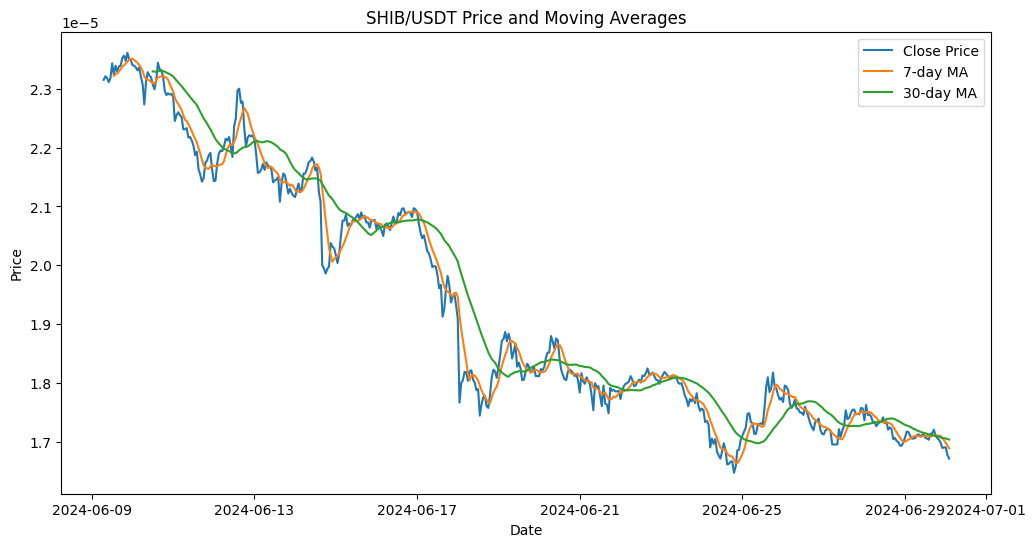

In [54]:
import polars as pl
import matplotlib.pyplot as plt

# Correct the datetime conversion
df = df.with_columns(
    pl.col('open_time').cast(pl.Int64).cast(pl.Datetime('ms')).alias('open_time')
)

# Calculate daily returns
df = df.with_columns(
    ((pl.col('close') - pl.col('open')) / pl.col('open')).alias('daily_return')
)

# Calculate moving averages
df = df.with_columns([
    pl.col('close').rolling_mean(window_size=7).alias('MA7'),
    pl.col('close').rolling_mean(window_size=30).alias('MA30')
])

# Find days with highest and lowest trading volume
highest_volume_day = df.filter(pl.col('volume') == pl.col('volume').max())
lowest_volume_day = df.filter(pl.col('volume') == pl.col('volume').min())

print("Day with highest trading volume:")
print(highest_volume_day.select(['open_time', 'volume']))

print("\nDay with lowest trading volume:")
print(lowest_volume_day.select(['open_time', 'volume']))

# Calculate average daily trading volume
avg_daily_volume = df['volume'].mean()
print(f"\nAverage daily trading volume: {avg_daily_volume:.2f}")

# Find the day with the highest price increase
highest_increase = df.filter(pl.col('daily_return') == pl.col('daily_return').max())
print("\nDay with highest price increase:")
print(highest_increase.select(['open_time', 'open', 'close', 'daily_return']))

# Calculate the correlation between volume and price change
correlation = df.select(pl.corr('volume', 'daily_return')).item()
print(f"\nCorrelation between volume and price change: {correlation:.4f}")

# Plot closing price and moving averages
plt.figure(figsize=(12, 6))
plt.plot(df['open_time'], df['close'], label='Close Price')
plt.plot(df['open_time'], df['MA7'], label='7-day MA')
plt.plot(df['open_time'], df['MA30'], label='30-day MA')
plt.title('SHIB/USDT Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()